In [25]:
import pandas as pd 
import plotly.express as px
import numpy as np 


In [91]:
df = pd.read_csv("telecom_churn.csv")
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [62]:
# Summary of data 
df.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [63]:
# check null and duplicate data
print(df.isna().sum())
print(f"duplicated data: {df.duplicated().sum()}")

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64
duplicated data: 0


In [ ]:
df["Churn"] = df["Churn"].map({0:"Continued Service",1:"Canceled Service"})
df["ContractRenewal"] = df["ContractRenewal"].map({0:"No Recent Renewal",1:"Recent Renewal"})
df["DataPlan"] = df["DataPlan"].map({0:"No Data Plan",1:"Has Data Plan"})

#### Overall Statistic

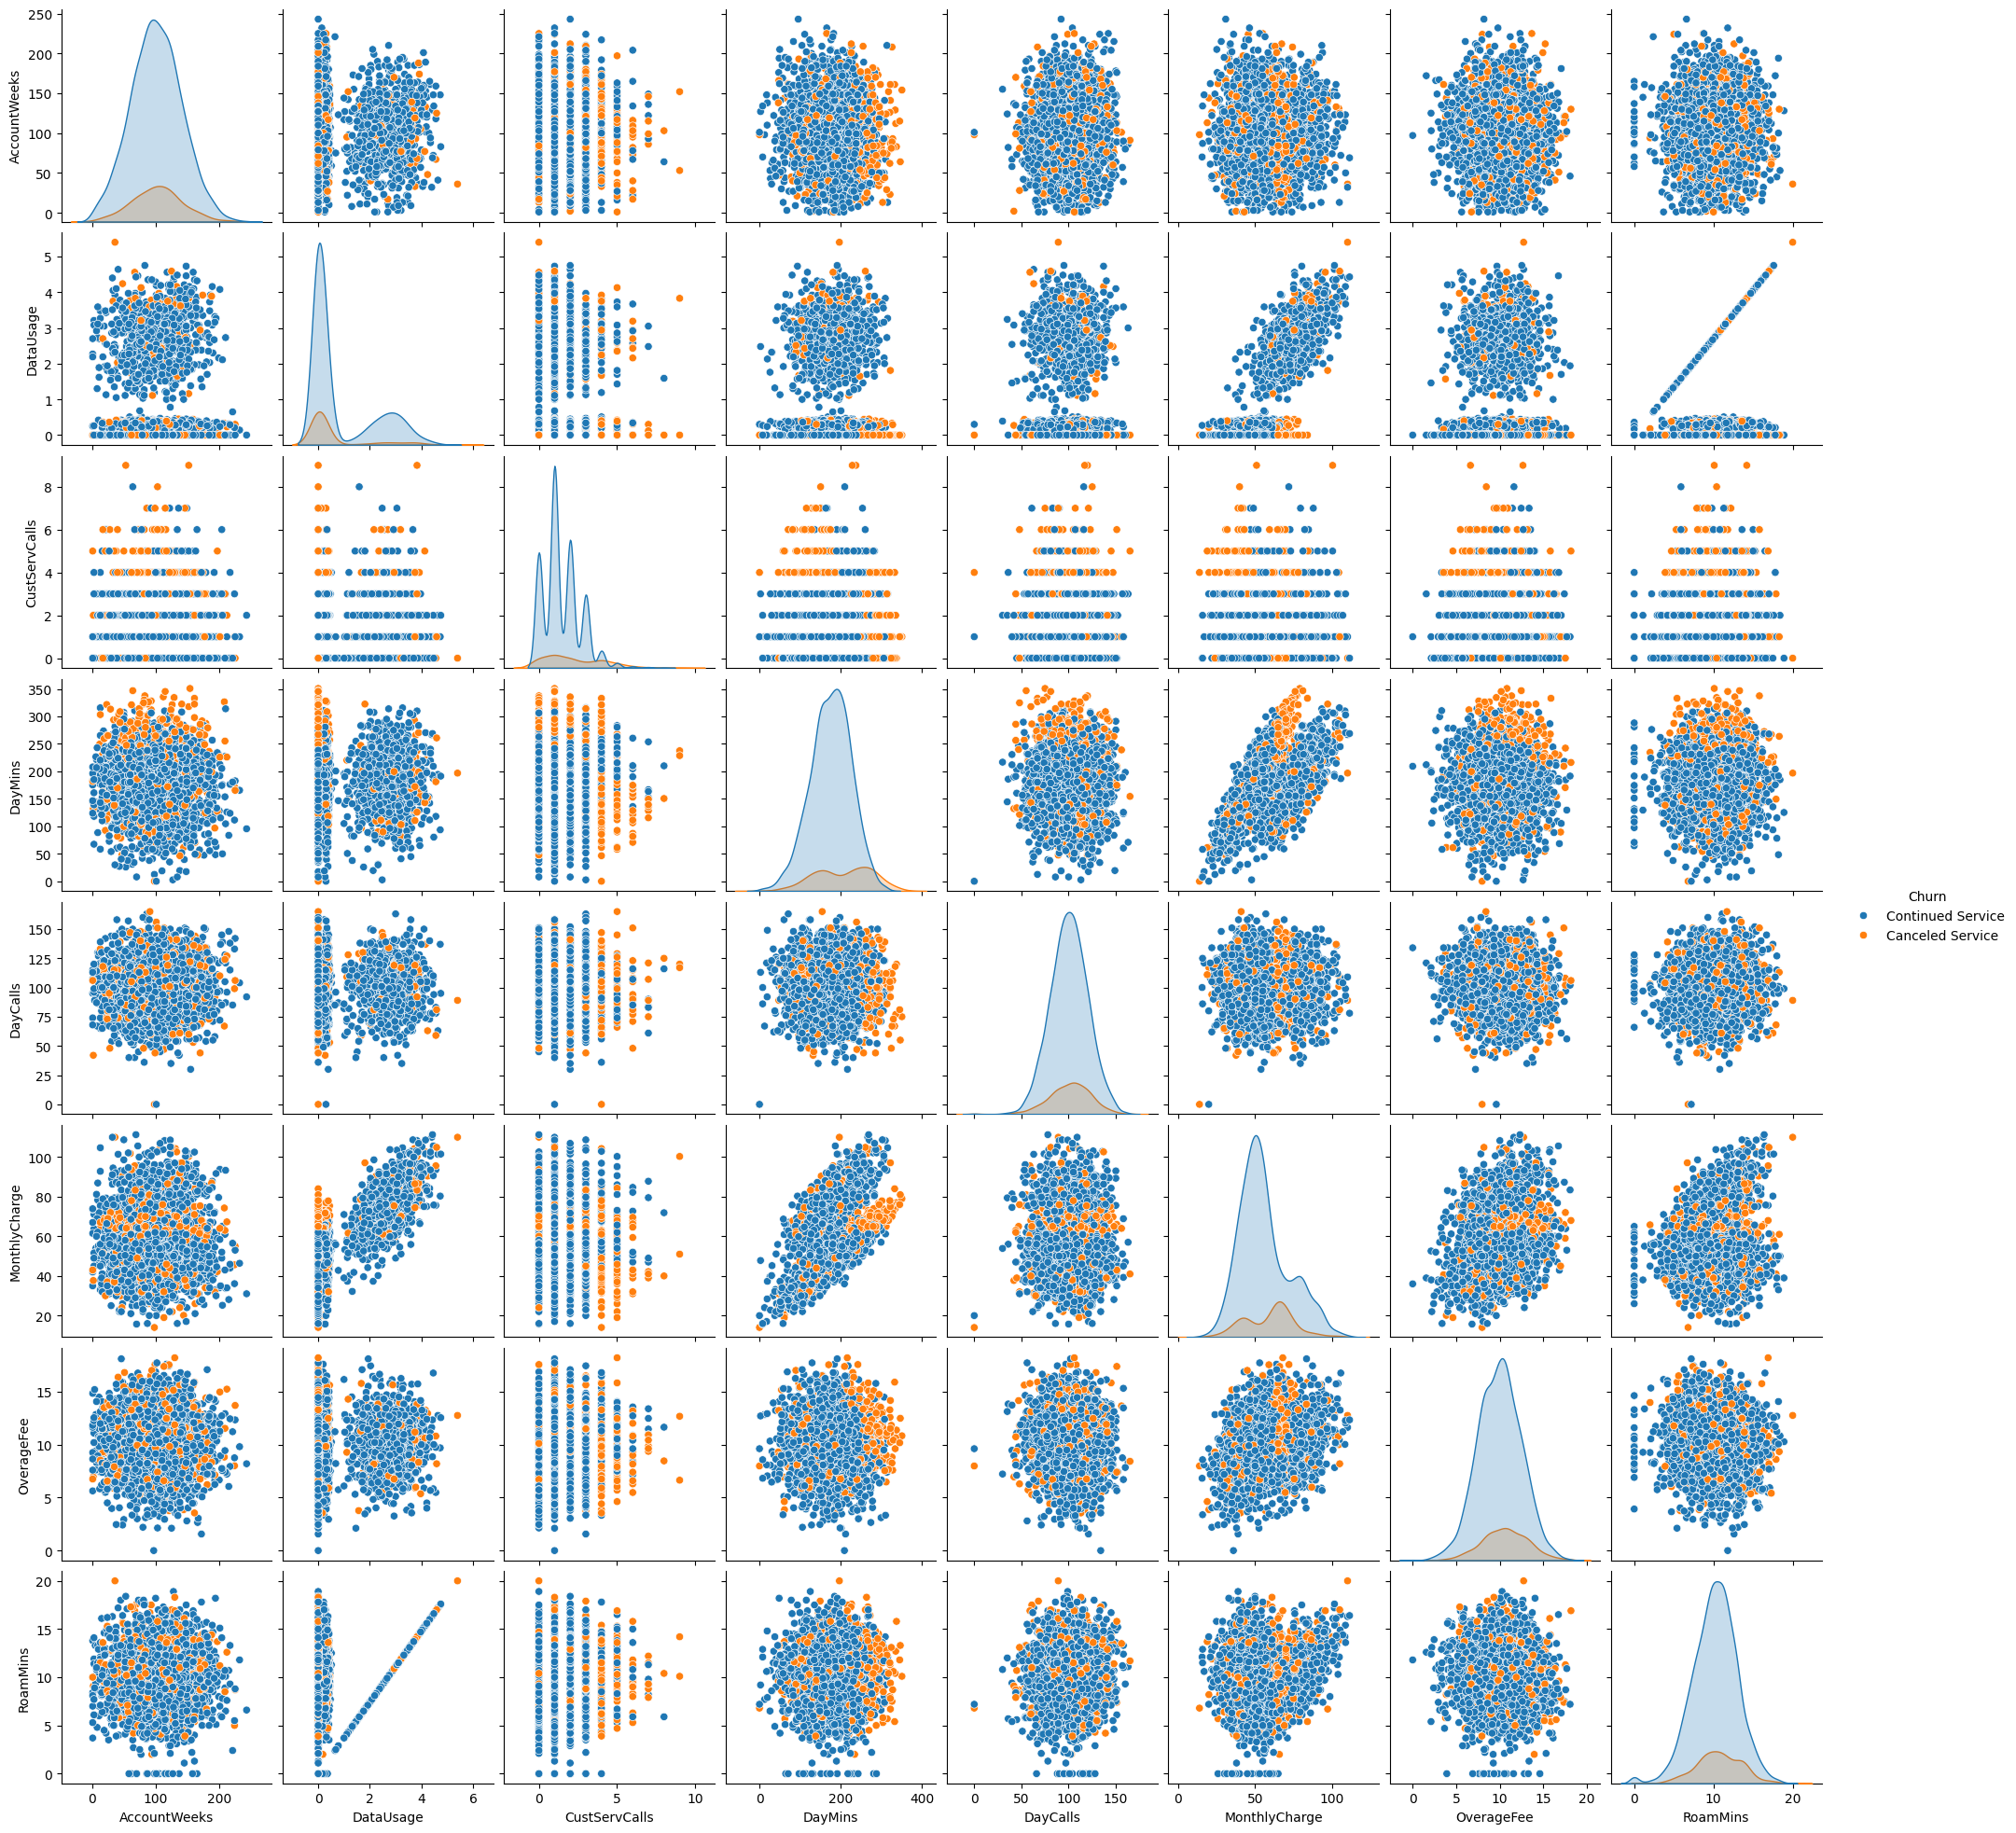

In [66]:
import seaborn as sb 
sb.pairplot(df,hue = "Churn")

##### Percentage of Churn vs Not Churn data

In [122]:
fig = px.pie(df,names = "Churn", opacity=0.8)
fig.update
fig.show()

We can see that there is imbalance data between `Churn` and `not Churn` 

In [133]:
numeric_df = pd.read_csv("telecom_churn.csv")
cor = numeric_df.corr()
fig = px.imshow(cor,text_auto=True)
fig.show()

This is the correlation matrix of all the data. In the next section we will go through a comparison of data that has correlation more than 0.2 or less than -0.2

##### Churn vs ContractRenewal

In [130]:
fig = px.histogram(df,"ContractRenewal",color = "Churn", opacity= 0.75)
fig.show()

In [131]:

grouped = df.groupby(["ContractRenewal", "Churn"]).size().reset_index(name="Count")

grouped["Percentage"] = grouped.groupby("ContractRenewal")["Count"].transform(lambda x: 100 * x / x.sum())

fig = px.bar(
    grouped, 
    x="ContractRenewal", 
    y="Percentage", 
    color="Churn", 
    text=grouped["Percentage"].round(1).astype(str) + "%",  # Display percentage labels
    opacity = 0.75,
    category_orders={"ContractRenewal": ["Recent Renewal", "No Recent Renewal"],"Churn":["Continued Service","Canceled Service"]}
)

fig.show()

After changing from count to percentage, we can see that people who recently renew the contract has less chance to terminate the service compare to people who didn't renew the contract.

##### CustServCall vs Churn

In [140]:
fig = px.histogram(df,"CustServCalls",color = "Churn",opacity = 0.75)
fig.show()

In [142]:
grouped = df.groupby(["CustServCalls", "Churn"]).size().reset_index(name="Count")

grouped["Percentage"] = grouped.groupby("CustServCalls")["Count"].transform(lambda x: 100 * x / x.sum())

fig = px.bar(
    grouped, 
    x="CustServCalls", 
    y="Percentage", 
    color="Churn", 
    text=grouped["Percentage"].round(1).astype(str) + "%",  # Display percentage labels
    opacity = 0.75,
    category_orders={"Churn":["Continued Service","Canceled Service"]}
)

fig.show()

Same as `Contract Renewal` when the `CustServCalls` is increase people have more chance to canceled the service. However, the higher chance to canceled the service might associate with the lower chance of having more `CustServCalls`. 

In [132]:
fig = px.histogram(df,"DataUsage",color = "DataPlan")
fig.show()

##### DayMin vs Churn

In [143]:
fig = px.histogram(df,"DayMins",color = "Churn",opacity = 0.75)
fig.show()

In [134]:
import statsmodels.api as sm 

X = numeric_df.drop(columns="Churn")
y = numeric_df["Churn"]
x = sm.add_constant(X)
model = sm.Logit(y,x)
result = model.fit()
# print(result.summary)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.328291
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3322
Method:                           MLE   Df Model:                           10
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.2066
Time:                        19:14:40   Log-Likelihood:                -1094.2
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                4.910e-116
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -5.9510      0.549    -10.845      0.000      -7.026      -4.876
AccountWeeks  

In [135]:
import pandas as pd

# Extract p-values from the model
p_values = result.pvalues

# Print all p-values
print(p_values)

# Filter significant variables (p-value < 0.05)
significant_vars = p_values[p_values < 0.05]
print("Significant Variables:\n", significant_vars)

# Filter non-significant variables (p-value >= 0.05)
non_significant_vars = p_values[p_values >= 0.05]
print("Non-Significant Variables:\n", non_significant_vars)


const              2.097675e-27
AccountWeeks       6.381307e-01
ContractRenewal    1.800734e-43
DataPlan           2.728633e-02
DataUsage          8.500296e-01
CustServCalls      7.352140e-39
DayMins            5.913585e-01
DayCalls           1.841224e-01
MonthlyCharge      8.852508e-01
OverageFee         5.662701e-01
RoamMins           3.452467e-04
dtype: float64
Significant Variables:
 const              2.097675e-27
ContractRenewal    1.800734e-43
DataPlan           2.728633e-02
CustServCalls      7.352140e-39
RoamMins           3.452467e-04
dtype: float64
Non-Significant Variables:
 AccountWeeks     0.638131
DataUsage        0.850030
DayMins          0.591359
DayCalls         0.184122
MonthlyCharge    0.885251
OverageFee       0.566270
dtype: float64


In [136]:
significant_vars = significant_vars.drop("const")
X_significant = X[significant_vars.index]


# Refit the model
logit_model = sm.Logit(y, sm.add_constant(X_significant))
result = logit_model.fit()

# Print new summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.357549
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 3333
Model:                          Logit   Df Residuals:                     3328
Method:                           MLE   Df Model:                            4
Date:                Thu, 27 Feb 2025   Pseudo R-squ.:                  0.1359
Time:                        19:14:40   Log-Likelihood:                -1191.7
converged:                       True   LL-Null:                       -1379.1
Covariance Type:            nonrobust   LLR p-value:                 7.457e-80
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4945      0.250     -5.990      0.000      -1.984      -1.005
ContractRenewa